# PS3 Problem 5: K-means for compression

In [153]:
import numpy as np
from scipy.spatial.distance import pdist

from IPython.display import Image
from matplotlib.image import imread
import matplotlib.pyplot as plt

%matplotlib inline

In [72]:
A = imread('mandrill-large.tiff')
B = imread('mandrill-small.tiff')

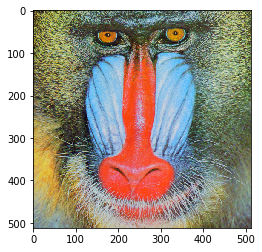

In [12]:
plt.imshow(A);
plt.show()

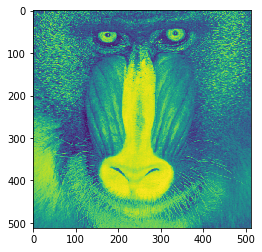

In [7]:
plt.imshow(A[:,:,0])
plt.show()

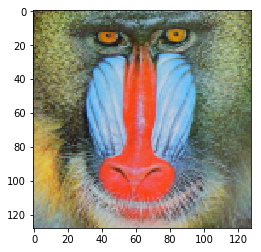

In [10]:
plt.imshow(B);
plt.show()

In [192]:
'''Works for square images'''
def kmeans(image, num_clusters=16):
    #initialize centroids
    image = np.reshape(image, (-1,3))
    idxs = np.random.choice(image.shape[0], size=num_clusters)
    centroids = image[idxs]  #Didn't know for nd.arrays, you can let nd.array indicies be an nd.array
#     print(centroids.shape) 16x3


    err_history = []
    err = 1e6
    while err > 1:
        dists_list = []
        for c in centroids:
            ds = np.sqrt(np.sum((image - c) ** 2, axis=1))
            dists_list.append(ds)

        assign = np.stack(dists_list).argmin(axis=0)
    #     print(assign.shape) (262144,)
    
        # new centroids
        new_centroids = []
        for k in range(num_clusters):
            new_centroids.append(np.mean(image[np.where(k==assign)[0]], axis=0))

        new_centroids = np.stack(new_centroids)
        err = np.sum(np.abs(new_centroids - centroids))
        err_history.append(err)
        centroids = new_centroids
        
    return centroids, assign, err_history
    

In [186]:
def kmean(X, num_clusters=16):
    # pikcing random data points from the data as the initial centroids to aovid empty cluster
    _idxes = np.random.choice(np.arange(X.shape[0]), size=num_clusters, replace=False)
    centroids = X[_idxes]

    err_history = []
    err = 1e6
    while err > 1:
        dists_list = []
        for c in centroids:
            ds = np.sqrt(np.sum((X - c) ** 2, axis=1))
            dists_list.append(ds)

        assign = np.stack(dists_list).argmin(axis=0)

        # new centroids
        nc_list = []
        for k in range(num_clusters):
            idxes = X[np.where(assign == k)[0]]
            nc_list.append(X[np.where(assign == k)[0]].mean(axis=0))

        nc = np.stack(nc_list)
        err = np.sum(np.abs(nc - centroids))
        err_history.append(err)    
        centroids = nc
    return centroids, assign, err_history

In [193]:
centroids,_,err_history = kmeans(A, 16)
print(centroids.shape)

(16, 3)


Text(0,0.5,'error')

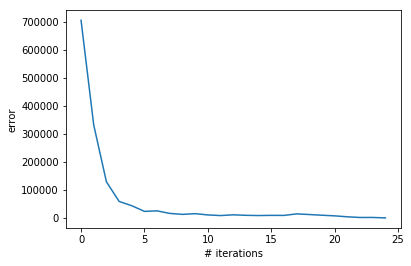

In [174]:
plt.plot(err_history)
plt.xlabel('# iterations')
plt.ylabel('error')

Text(0,0.5,'error')

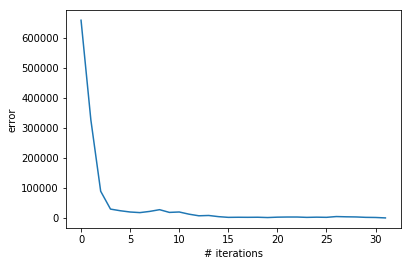

In [177]:
plt.plot(err_history)
plt.xlabel('# iterations')
plt.ylabel('error')

## (c)

In [194]:
dists_list = []
# dim = A.shape[0]
X_large = A.reshape(-1, 3)
for c in centroids:
    ds = np.sqrt(np.sum((X_large - c) ** 2, axis=1))
    dists_list.append(ds)
assign = np.stack(dists_list).argmin(axis=0)

In [195]:
assign.shape

(262144,)

In [197]:
num_clusters = 16
compressed = np.zeros_like(X_large)
for k in range(num_clusters):
    idxes = np.where(assign == k)[0]
    compressed[idxes] = centroids[k]

Text(0.5,1,'original large compressed to 16 colors')

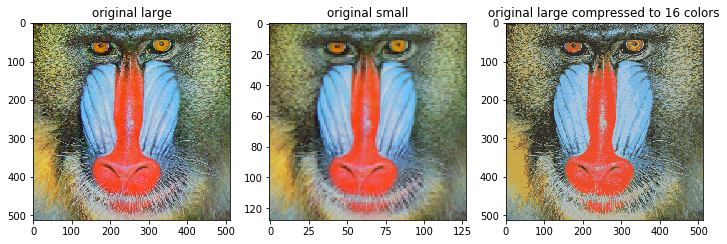

In [199]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax0, ax1, ax2 = axes.ravel()
im_small = B
ax0.imshow(im_large)
ax0.set_title('original large')
ax1.imshow(im_small)
ax1.set_title('original small')
ax2.imshow(compressed.reshape(dim, dim, 3))
ax2.set_title('original large compressed to 16 colors')

In [92]:
a = np.array([[1,2],[3,4],[3,4]])
indxs = np.array([0,1])
print(a.shape)
print(type(indxs))
a[indxs]
for i in a:
    print('hi')
s = np.sum(a,axis=0)
s

(3, 2)
<class 'numpy.ndarray'>
hi
hi
hi


array([ 7, 10])

In [70]:
type(A)

numpy.ndarray

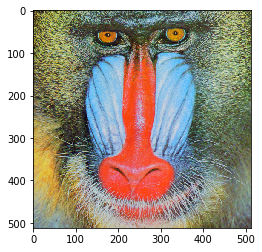

In [73]:
plt.imshow(A)
plt.show()

In [77]:
temp = np.reshape(A,(-1,3))
print(temp[0])

[164 150  71]
